# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.


- Kyle Moore | kcm004@ucsd.edu 
- Sebastian Balica | sbalica@ucsd.edu 
- Javon Maxie | jmaxie@ucsd.edu 
- Sam Woo | sdwoo@ucsd.edu 

# Abstract 
We will use regular season statistics of NBA players from [basketball reference](https://www.basketball-reference.com/) to predict voting results for All NBA awards. All NBA awards are highly prestigious and directly impact how much money a player can earn, as well as the betting market surrounding awards. The data will be cleaned using minute and year restrictions, and labeling whether or not a player was All NBA. Modeling will be performed with various classification methods from python’s sklearn: k nearest neighbors, support vector machines, and random forest; to determine the best prediction accuracy as well as the most impactful statistics(feature selection) a player can have. We will determine success through the classification reports including the F-Scores of each classification model due it being one of the better assessors when using imbalanced data, such as 15 All NBA players vs ~500 total players per year.

# Background
The All-NBA Team is an honor given to 15 players at the end of the each season. Media members vote on the league's best players and defenders, with two guards, two forwards, and one center picked for each team. This recognition, and voting process has been happening since 1956, with experts and sports enthusiasts making predictions on which players will make the All-NBA Team based on their statistics in the previous season. Sports predictions will take into consideration the average points, rebounds, assists, steals, and blocks per game for every player, in determining who has the highest chance of being awarded. Despite these strong predictions, how the selections are made has been a matter of controversy. Currently players are chosen according to positions, however this becomes a problem when players are considered multi-positional<a name="golliver"></a>[<sup>[1]</sup>](#gollivernote) or, for example, the two best players in the league are centers. One of these players will be bumped down to the second team despite being a top five player in the NBA. Using machine learning and player data, it can be decided which players really deserve to be on the All-NBA Team regardless of position. 

There have been lots of models, both personal and professional, that have been created to help predict anything that can happen in sports. While some of this is fan and "stathead" related, it also coincides with sports betting doubling in 2021<a name="marquardt"></a>[<sup>[2]</sup>](#marquardtnote) and the desire to gain an edge. Being able to predict sports through statistics can also be lucrative for finding talent, such as the famous "moneyball" scenario of the Oakland A's. Data analytics have also completely changed the way that games are played, coached, and practiced<a name="cohen"></a>[<sup>[3]</sup>](#cohennote). There have been previous attempts at using both classification and linear regression to predict NBA awards such as most valuable player(MVP), offensive and defensive players of the year(OPOY,DPOY), rookie of the year(ROY), and even whether or not someone will be inducted into the Hall of Fame.

One article details the use of regression to predict the MVP by considering "MVP share" as a numerical target<a name="yoo"></a>[<sup>[4]</sup>](#yoonote). They used the same dataset that we used in addition to their MVP voting data, and also linked to a [web scraper](https://github.com/jaebradley/basketball_reference_web_scraper) that might be something to consider if we have trouble getting all of the data that we need. Yoo was able to acheive an accuracy of ~.83 using an XGBoost Regressor. We won't be able to use regression due to our problem being a classification problem, whether someone is on the All NBA team or not. 

Albert et al.<a name="albert"></a>[<sup>[5]</sup>](#albertnote) used Adaboost, random forest, and multilayer perceptron classifications to predict All Star results as opposed to All NBA. They were able to achieve an accuracy ~.9. They did do a preliminary, 40-fold cross-validation sensitivity test that included other models: SVC, k-nearest neighbor, decision tree, gaussian process; but it was determined that RF, Adaboost, and MLP were the best to move forward with. We will be using one model that they chose, RF, and two models they did not, SVC and KNN. 

Since we are planning on predicting only whether or not a player makes All NBA as ooposed to whether they make 1st, 2nd, or 3rd team, we are hoping to achieve similar results to the projects above. A logical future step would be to predict position voted for and which team they made. We feel that All NBA is less studied yet very important due to its impact on player salaries, such as Celtic's Jayson Tatum losing out on $32.6 million due to missing All NBA<a name="darren"></a>[<sup>[6]</sup>](#darrennote), as well as their overall legacy. Being able to predict these results could also help determine future salary cap considerations, trade values, betting before the lines change, and knowledge of which skills are most important for consideration.

# Problem Statement

Predicting whether a player will make or not make an All NBA team using their regular season statistics. Regular season statistics include points, assists, ft%, etc. and are very quantifiable due to the nature of sport statistics. The All NBA results will be the class labels (0/1). There are many machine learning classification options that can be applied and tuned to this problem (we will use KNN/SVM/RF). We can test the accuracy on test seasons after creating the models on training seasons. Due to the annual nature of the NBA, this problem is repeatable and the model will be applicable to future seasons. 

# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
    - [Web Scraping and Data Cleaning Notebook](web_scraper_and_cleaning.ipynb)
    - Obtained from https://www.basketball-reference.com/
- description of the size of the dataset (# of variables, # of observations)
    - After cleaning and merging the shape is (11586, 30) so 30 variables with 11,586 observations
    - After more testing, we hope to be able to reduce the number of variables to those most correlated
- what an observation consists of
    - Each observation is a Player's stats for a single season
    - Variables
        - 'Pos'
            - Position
        - 'Age'
            - Age
        - 'Tm'
            - Team
        - 'G'
            - Games played
        - 'GS'
            - Games started
        - 'MP'
            - Minutes played per game
        - 'FG'
            - Field goals made per game
        - 'FGA'
            - Fiedl goals attempted per game
        - 'FG%'
            - Field goal percentage
        - '3P'
            - 3 pointers made per game
        - '3PA'
            - 3 pointers attempted per game
        - '3P%'
            - 3 point percentage
        - '2P'
            - 2 pointers made per game
        - '2PA'
            - 2 pointers attempted per game
        - '2P%'
            - 2 point percentage
        - 'eFG%'
            - (2pt FGM + 1.5*3pt FGM) / FGA
            - Effective field goal percentage, includes value of a 3 vs a 2 pointer
        - 'FT'
            - Free throws made per game
        - 'FTA'
            - Free throws attempted per game
        - 'FT%'
            - Free throw percentage
        - 'ORB'
            - Offensive rebound per game
        - 'DRB'
            - Defensive rebound per game
        - 'TRB'
            - Total rebounds per game
        - 'AST'
            - Assists per game
        - 'STL'
            - Steals per game
        - 'BLK'
            - Blocks per game
        - 'TOV'
            - Turnovers per game
        - 'PF'
            - Personal fouls per game
        - 'PTS'
            - Points per game
        - 'Year'
            - Year the season ended in
        - 'all_nba_team'
            - All NBA team results
- what some critical variables are, how they are represented
    - Because All NBA takes into account a players entire seasons performance, all of these statistics are important for determining voting results
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!
    - Gathering, cleaning, and transformations also in notebook linked above.


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import os
from datetime import date

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Run our notebook to generate the dataframe

%run web_scraper_and_cleaning.ipynb

In [3]:
# Assign dataframe to the merged dataframe created in the web scraping notebook

df = merged_df

In [12]:
print('The shape of the dataframe is:', df.shape)
print('The columns of the dataframe are: \n', [x for x in df.columns])

The shape of the dataframe is: (11586, 30)
The columns of the dataframe are: 
 ['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'all_nba_team']


In [13]:
# create column of class labels, 1 for All NBA, 0 for not

df['all_nba'] = np.where(df['all_nba_team'] >= 1, 1, 0)

# Proposed Solution
Our soultion to our problem statement is to train a model on a set of various basketball statistics from players that have made All NBA in the past. We will use stats from players from 1989-1900 season all the way to the 2020-2021 season. The reason we will not used stats from before 1989 is because there were only 2 All NBA teams selected. After 1989 the league started selecting three All NBA teams. Using libraries such as pandas, numpy, and scikit learn, we would like to test various models on our set of basketball statistics in order to get a preditiction of whether or not a player should make All NBA team or not. Some of the models we are planning to test our soltuion on are logistic regression, random forest, KNN, and SVM to start. Using model selection we will be able to see how the different models we use on our data stack up against one another. From there we will be able to determine which model performs the best.  The solution to our model will be reproducible because as more and more NBA season happen we will be able to not only makes predictions on who should make All NBA, but also add the stats for the players that do make All NBA teams in the future to make our model stronger. 

# Evaluation Metrics
One way we will evaluate the success of our models will be through the use of an accuracy score from the sklearn library. This will allows us to gauge how well our models are peforming when it comes to the predicting whether or not a player meets the criteria to be selected to an All NBA team. Another way we will evaluate the success of our models is by looking at there precision and recall scores. Using those scores we can also go ahead and calculate the F1-scores for each model to really solidify our idea of which model performs the best. F score is a great metric for imbalanced classes such as ours. In order to look at our models on the variable scale and see how each player statistic effects the overall model, we will be using sklearn's classification report. Theses reports will allow us to see the precision and recall scores for each variable in the training set of our models. From here we may be able to derive new models and drop certain player statistics from our training set that are holding our models back with low scores to see if we can improve the overall accuracy of our models.  

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [79]:
numeric_columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', '2P%', 
                   'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'all_nba']

<AxesSubplot:>

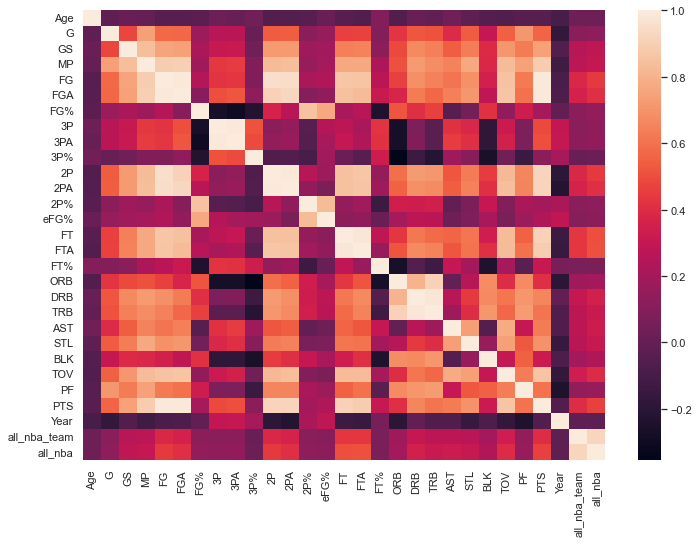

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr())

In [81]:
# This is to show who has NaN for 3P% due to shooting no 3s but still made all_nba
# df[(df['3PA']==0) & (df['all_nba']==1)]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    df[numeric_columns].drop(columns='all_nba'), df.all_nba, test_size=.33, random_state=42, stratify=df.all_nba)

In [83]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7762, 25) (3824, 25) (7762,) (3824,)


In [97]:
clf = LogisticRegression(random_state=42, max_iter=5000).fit(X_train, y_train)

In [98]:
clf.score(X_train, y_train)

0.9759082710641587

In [99]:
clf.score(X_test, y_test)

0.9767259414225942

This accuracy is very high and is likely due to the imbalance of our classes. The model can just assume that nobody makes All NBA and do quite well. We will have to think of ways to combat this. We will want to look at a confusion matrix and employ the use of F1 score to get a better idea of how any of our models are performing.

# Ethics & Privacy

Potential ethical implications of using a model to predict All NBA players include indirectly altering the game and playstyles, by indicating that a certain playstyle is more likely to be rewarded with All NBA votes over other playstyles. Consequently, all players may try to model their games after this select playstyle, which could result in the NBA becoming less entertaining and more rigid and monotonous. 

Anything sports related must consider gambling and its effects on people as well. Betting on All NBA teams exists but is a season long bet, and our model won't have the reach or power to have an impact on bets or opinions but it is important to acknowledge for any future work. The data itself is free use from basketball reference and they only charge for custom sets. More about their data use rules can be read on [their page](https://www.sports-reference.com/data_use.html).

Moreover, in a broader scope of things, singling out what statistics are most indicative of making an All NBA player may result in decreased appreciation for those unselfish players who sacrifice their individual statistics in order to increase team performance. These players would never get their due recognition, as they would be overshadowed by the “logically correct” players determined by the model. Though to an extent, both of these phenomena are things that are already happening in the league today. 

# Team Expectations 

- We expect equal contributions from all team members (unless extra work is voluntary).
- We expect respectful and timely communication, largely through Discord.
- We will make decisions based on group consensus or majority vote.
- We will do early week check-ins to establish responsibilities and then meet again to confirm completion.
- If issues arise, we’ll communicate with one another and ensure that everyone’s input is heard. If our issue cannot be resolved, we agree to contact the professor or the TA for further guidance.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/25  |  7 PM |  N/A  | First steps, download datasets, begin cleaning | 
| 4/29 | 11:59 PM | First Peer Reviews Due | Turn in all required reviews |
| 5/17  |  7 PM |  Finish cleaning | EDA ideas, Dataset problems? Discuss the reviews of our project | 
| 5/19  | 7 PM  | Finish EDA and Dataset in correct form for modelling | Assign different models to group members/Catchup |
| 5/20 | 11:59 PM | Checkpoint: data processed, EDA started, clear idea of next steps and pilot results | Turn in Checkpoint Requirements |
| 5/21 | 7 PM | Use grid search for model selection to determine which to pursue | Discuss how to apply model |
| 5/23 | 7 PM  | Have attempts for all desired models | Discuss issues and potential pivots, or plan for finishing models |
| 5/27 | 7 PM  | Finalize Rough Draft of Project | Discuss/edit project code; Complete project |
| 5/30 | 7 PM  | Complete analysis; Draft results/conclusion/discussion| Discuss/edit full project |
| 6/8  | N/A  | Final revisions | Turn in Final Project  |

# Footnotes
<a name="gollivernote"></a>1.[^](#golliver): Golliver, B. (2021, May 11). Analysis | the all-NBA ballot is a bit of a mess thanks to position confusion. The Washington Post. Retrieved April 24, 2022, from https://www.washingtonpost.com/sports/2021/05/10/all-nba-teams-ballot-position-problems/ 

<a name="marquardtnote"></a>2.[^](#marquardt):Marquardt, A. (2022, January 25). Legalized sports betting in the U.S. doubled in 2021. here's why that will continue after 'the greatest weekend in NFL playoff history.'. Fortune. Retrieved April 24, 2022, from https://fortune.com/2022/01/24/legalized-sports-betting-in-the-u-s-doubled-in-2021-heres-why-that-will-continue-after-the-greatest-weekend-in-nfl-playoff-history/#:~:text=Overall%2C%20the%20number%20of%20Americans,National%20Council%20on%20Problem%20Gambling. 

<a name="cohennote"></a>3.[^](#cohen):Cohen, B., Diamond, J., &amp; Beaton, A. (2019, December 19). The decade when numbers broke sports. The Wall Street Journal. Retrieved April 24, 2022, from https://www.wsj.com/articles/2010s-decade-when-numbers-broke-sports-11576710216 

<a name="yoonote"></a>4.[^](#yoo):Yoo, D. (2022, February 16). Predicting the next NBA MVP using Machine Learning. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/predicting-the-next-nba-mvp-using-machine-learning-62615bfcff75 

<a name="albertnote"></a>5.[^](#albert):Albert, A.A.; de Mingo López, L.F.; Allbright, K.; Gomez Blas, N. A Hybrid Machine Learning Model for Predicting USA NBA All-Stars. Electronics 2022, 11, 97. https://doi.org/10.3390/electronics11010097

<a name="darrennote"></a>6.[^](#darren):Darren Hartwell. (2021, June 29). How Tatum wants all-NBA voting process to change after snub. RSN. Retrieved April 24, 2022, from https://www.nbcsports.com/boston/celtics/celtics-jayson-tatum-reacts-all-nba-snub-losing-out-33m#:~:text=The%20Boston%20Celtics%20star%20just,to%20his%20upcoming%20contract%20extension. 
